# CNN for 30 Day mortality 

- We use two CNNs here for comparison
- one is very simple with few layers, about one million params.
- another one is a modified VGG16 network, about 10 million params.
- the mordel performance is evaluated by accuracy, confusion metrics, ROC, PRC
- `train_model` is used for indicating training or load weights

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, ZeroPadding1D, Convolution1D
import os

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import metrics
sns.set_style('whitegrid')
sns.set_palette('Set2')
# %matplotlib inline

#  A simple CNN 


- [reference](https://keras.io/examples/cifar10_cnn/)


- loss: binary_crossentropy
- optimizer: adam
- metrics: accuracy
- learning rate : 0.001
- batch size: 64
- epochs: 26/30
- callbacks: earlystoopping(patient 3, restore to best weights).


In [3]:
train_model = True
batch_size = 64
num_classes = 2
epochs = 30
save_dir = os.path.join(os.getcwd(), 'saved_models')

In [4]:
# data =pd.read_csv('data_pre_processed.csv')
testing_data = pd.read_csv('data_pp_test_30d.csv')
training_data=  pd.read_csv('data_pp_train_30d.csv')
data = training_data

In [5]:
print('Total data shape is ', data.shape)
data.head()

Total data shape is  (38857, 108)


,first_careunit,last_careunit,age,gender,marital_status,insurance,urea_n_min,urea_n_max,urea_n_mean,platelets_min,...,spo2_max_mv,spo2_mean_mv,vent_mv,rrt_mv,urineoutput_mv,oasis_mv,lods_mv,sirs_mv,thirty_days,one_year
0,0.358226,-0.375558,-0.091698,-1.125040,0.002484,0.721077,0.336293,0.533833,0.568295,-0.307287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.058760,1.040694,-0.138448,-1.125040,-0.795334,0.721077,1.458096,0.982380,1.364434,-0.617702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.358226,-0.375558,4.139580,-1.125040,-0.795334,0.721077,-0.411576,-0.523458,-0.401365,-1.206421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.058760,1.040694,0.115679,-1.125040,-0.795334,0.721077,0.261506,-0.395301,-0.145096,2.058292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.358226,-0.375558,-0.268887,0.888858,0.800302,-0.508846,0.111932,-0.299184,-0.088050,-1.067269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
columns = list(data.columns)

X = training_data[columns[0:-2]].astype(np.float32) # fetures
y = training_data[columns[-2]].astype(np.float32)  # 30 days

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)


X_test = testing_data[columns[0:-2]].astype(np.float32) # fetures
y_test = testing_data[columns[-2]].astype(np.float32)  # 30 days

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_val.shape[0], 'validation samples')
print(X_test.shape[0], 'test samples')

X_train shape: (31085, 106)
31085 train samples
7772 validation samples
19139 test samples


In [7]:
# Define models here
model = Sequential()
model.add(Conv1D(32, 3, padding='same', input_shape=[X_train.shape[1],1]))
model.add(Activation('relu'))
model.add(Conv1D(32, 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv1D(64, 3, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
# initiate RMSprop optimizer
# opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])#, km.binary_precision(), km.binary_recall()])

X_train = X_train.values[..., None].astype('float32')
X_val = X_val.values[..., None].astype('float32')
X_test = X_test.values[..., None].astype('float32')

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 106, 32)           128       
_________________________________________________________________
activation (Activation)      (None, 106, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 104, 32)           3104      
_________________________________________________________________
activation_1 (Activation)    (None, 104, 32)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 52, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 52, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 52, 64)            6208      
__________

In [9]:
X_train.shape

(31085, 106, 1)

In [10]:
if train_model:
    hist = model.fit(X_train, y_train,
              batch_size=64,
              epochs=30,
              verbose = 1,
              validation_data=(X_val, y_val),
              shuffle=True,
                callbacks= [keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)] )
    
    # Save model and weights
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    model_path = os.path.join(save_dir, 'keras_trained_model_30_day.h5')
    model.save(model_path)
    print('Saved trained model at %s ' % model_path)

else:
    # load weights 
    filepath = './saved_models/keras_trained_model_30_day.h5'
    model.load_weights(filepath, by_name=False)


Train on 31085 samples, validate on 7772 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
31085/31085 [==============================] - 9s 276us/sample - loss: 0.3342 - acc: 0.8679 - val_loss: 0.2728 - val_acc: 0.8895
Epoch 2/30
31085/31085 [==============================] - 6s 177us/sample - loss: 0.2858 - acc: 0.8870 - val_loss: 0.2584 - val_acc: 0.9018
Epoch 3/30
31085/31085 [==============================] - 5s 155us/sample - loss: 0.2688 - acc: 0.8922 - val_loss: 0.2373 - val_acc: 0.9039
Epoch 4/30
31085/31085 [==============================] - 5s 159us/sample - loss: 0.2547 - acc: 0.8996 - val_loss: 0.2270 - val_acc: 0.9116
Epoch 5/30
31085/31085 [==============================] - 5s 157us/sample - loss: 0.2422 - acc: 0.9028 - val_loss: 0.2186 - val_acc: 0.9159
Epoch 6/30
31085/31085 [==============================] - 5s 161us/sample - loss: 0.2308 - acc: 0.9086 - val_loss: 0.2073 - val_acc: 0.9207
Epoch 7/30
31085/31085 [==============================] - 5s 14

# Metrics 

In [11]:
def probability_to_label(probabilities, threshold=0.5):
    probabilities = list(probabilities)
    th = threshold
    predictions = [1 if i > th else 0 for i in probabilities]
    return predictions

In [12]:
def plot_cm(y_true, y_pred, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.set_style('white')
    
    cm = metrics.confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normarlize 
    
    from sklearn.utils.multiclass import unique_labels
    classes = unique_labels(y_true, y_pred)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    
    pass

In [13]:
def plot_ROC(fpr, tpr, auc, title = 'ROC curve'):
    sns.set_style('whitegrid')

#     plt.figure(figsize=(8,6))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=' (AUC = {:.3f})'.format(auc))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(title)
    plt.legend(loc='best')
    plt.show()
    pass

In [14]:
def plot_PRC(precision, recall, ap, title= 'Precision-Recall Curve '):
    sns.set_style('whitegrid')

    plt.figure
#     plot(result5_1[0], result5_1[1],linestyle = "-", color = 'C0')#,label = 'AUC = %0.2f' % result5_1[3])
    plt.plot(recall, precision, lw=2, label='AP = %0.4f' % ap )
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc="best")
#     plt.show()
    pass 

In [15]:

# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

19139/19139 [==============================] - 2s 105us/sample - loss: 0.1615 - acc: 0.9428
Test loss: 0.1615214656636121
Test accuracy: 0.942787


In [16]:
y_score = model.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
auc = metrics.auc(fpr, tpr)
auc

0.962061569848037

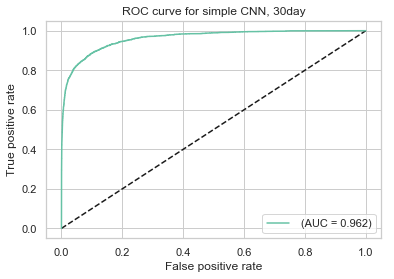

In [17]:
plot_ROC(fpr, tpr, auc, title = 'ROC curve for simple CNN, 30day')

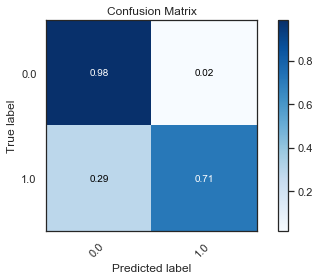

In [18]:
y_pred = probability_to_label(y_score, threshold=0.5)
plot_cm(y_test, y_pred)

In [19]:
average_precision = metrics.average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.4f}'.format(
      average_precision))
average_precision

Average precision-recall score: 0.8830


0.8830495374051015

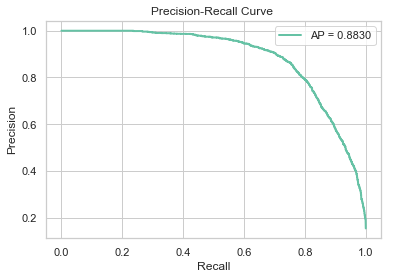

In [20]:
precision, recall, _ = metrics.precision_recall_curve(y_test, y_score)
plot_PRC(precision, recall, average_precision)

In [21]:
print('The F1 score is ', metrics.f1_score(y_test, y_pred))

The F1 score is  0.7930447930447931


# Modified VGG16
[reference](https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3)

- loss: binary_crossentropy
- optimizer: adam
- metrics: accuracy
- learning rate : 0.001
- batch size: 512
- epochs: 14/30
- callbacks: earlystoopping(patient 3, restore to best weights).

In [22]:
model = Sequential()
model.add(ZeroPadding1D(1,input_shape=[X_train.shape[1],1]))
model.add(Convolution1D(64, 3, activation='relu'))
model.add(ZeroPadding1D(1))
model.add(Convolution1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2, strides=2))

model.add(ZeroPadding1D(1))
model.add(Convolution1D(128, 3, activation='relu'))
model.add(ZeroPadding1D(1))
model.add(Convolution1D(128, 3, activation='relu'))
model.add(MaxPooling1D(2, strides=2))

model.add(ZeroPadding1D(1))
model.add(Convolution1D(256, 3, activation='relu'))
model.add(ZeroPadding1D(1))
model.add(Convolution1D(256, 3, activation='relu'))
model.add(ZeroPadding1D(1))
model.add(Convolution1D(256, 3, activation='relu'))
model.add(MaxPooling1D(2, strides=2))

model.add(ZeroPadding1D(1))
model.add(Convolution1D(512, 3, activation='relu'))
model.add(ZeroPadding1D(1))
model.add(Convolution1D(512, 3, activation='relu'))
model.add(ZeroPadding1D(1))
model.add(Convolution1D(512, 3, activation='relu'))
model.add(MaxPooling1D(2, strides=2))

model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))



In [23]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'] )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding1d (ZeroPadding1 (None, 108, 1)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 106, 64)           256       
_________________________________________________________________
zero_padding1d_1 (ZeroPaddin (None, 108, 64)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 106, 64)           12352     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 53, 64)            0         
_________________________________________________________________
zero_padding1d_2 (ZeroPaddin (None, 55, 64)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 53, 128)           24704     
__________

In [24]:
if train_model:
    hist = model.fit(X_train, y_train,
              batch_size=64,
              epochs=30,
              verbose = 1,
              validation_data=(X_val, y_val),
              shuffle=True,
                callbacks= [keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)] )
    # Save model and weights
    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    model_path = os.path.join(save_dir, 'Modified_VGG_30_day.h5')
    model.save(model_path)
    print('Saved trained model at %s ' % model_path)
else:
    # load weights 
    filepath = './saved_models/Modified_VGG_30_day.h5'
    model.load_weights(filepath, by_name=False)


Train on 31085 samples, validate on 7772 samples
Epoch 1/30
31085/31085 [==============================] - 26s 848us/sample - loss: 0.3846 - acc: 0.8550 - val_loss: 0.3126 - val_acc: 0.8740
Epoch 2/30
31085/31085 [==============================] - 24s 759us/sample - loss: 0.3056 - acc: 0.8802 - val_loss: 0.2786 - val_acc: 0.8929
Epoch 3/30
31085/31085 [==============================] - 24s 772us/sample - loss: 0.2634 - acc: 0.8950 - val_loss: 0.2418 - val_acc: 0.9093
Epoch 4/30
31085/31085 [==============================] - 23s 749us/sample - loss: 0.2326 - acc: 0.9097 - val_loss: 0.2248 - val_acc: 0.9068
Epoch 5/30
31085/31085 [==============================] - 23s 755us/sample - loss: 0.2072 - acc: 0.9219 - val_loss: 0.2083 - val_acc: 0.9200
Epoch 6/30
31085/31085 [==============================] - 25s 791us/sample - loss: 0.1877 - acc: 0.9297 - val_loss: 0.1989 - val_acc: 0.9251
Epoch 7/30
31085/31085 [==============================] - 24s 756us/sample - loss: 0.1690 - acc: 0.9375 -

In [25]:


# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

19139/19139 [==============================] - 5s 250us/sample - loss: 0.2056 - acc: 0.9288
Test loss: 0.20557472384631856
Test accuracy: 0.92878413


In [26]:
y_score = model.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
auc = metrics.auc(fpr, tpr)
auc

0.9413492726590388

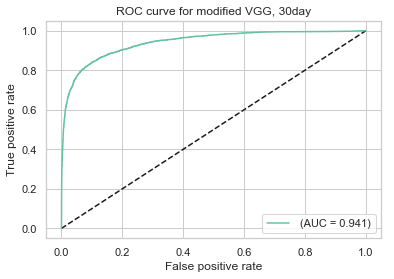

In [27]:
plot_ROC(fpr, tpr, auc, title = 'ROC curve for modified VGG, 30day')

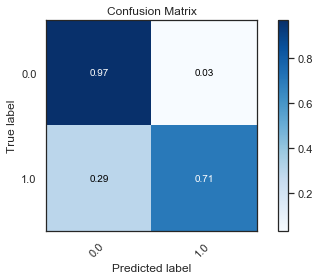

In [28]:
y_pred = probability_to_label(y_score, threshold=0.5)
plot_cm(y_test, y_pred)

In [29]:
average_precision = metrics.average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.83


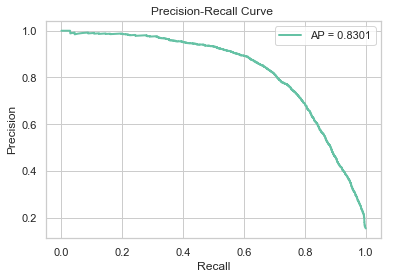

In [30]:
precision, recall, _ = metrics.precision_recall_curve(y_test, y_score)
plot_PRC(precision, recall, average_precision)

In [32]:
print('The F1 score is ', metrics.f1_score(y_test, y_pred))

The F1 score is  0.7526764652513155
